<div style="width: 100%; padding: 20px;">
    <center>
        <img src="Images/nus_logo.png" width="200" style="margin-bottom: 30px;">
    </center>
    <div style="font-size: 45px; color:#002147; font-weight: bold; text-align: center; margin-bottom: 50px;">
        EE2211 Introduction to Machine Learning
    </div>
    <div style="font-size: 32px; color:#FF6F00; text-align: center; margin-bottom: 30px; font-weight: normal;">
        Optional Python Session (Week 10)
    </div>
    <hr style="border: none; border-top: 2px solid #002147; width: 80%; margin: 0 auto 30px auto;">
    <p style="text-align:right; font-size: 18px; font-weight: normal; margin-right: 20px;">
        <strong>Mr. ZHU, Zikun</strong><br>
        Department of Electrical and Computer Engineering
    </p>
</div>

<img src="Images/gradient_descent_manim.gif" width="750" align="center">

# Gradient Descent

## Introduction

Gradient Descent is a fundamental optimization algorithm widely used in machine learning to minimize cost functions. It iteratively adjusts the weights of a model to find the values that minimize the cost function, thereby improving the model's performance.

---

### What is Gradient Descent?

- **Gradient:** The gradient of a function indicates the direction of the steepest ascent. It tells you which direction to move to increase the function's value most rapidly.
  
- **Negative Gradient:** Taking the negative of the gradient points in the direction of the steepest descent, which is the direction to decrease the function's value most rapidly.

- **Magnitude of Gradient:** The length (magnitude) of the gradient vector indicates how steep the slope is. A larger magnitude means a steeper slope.

---

### The Gradient Descent Algorithm

<center>
    <img src="Images/gradient_descent_algo.png" width="800" style="margin-top: 30px; margin-bottom: 30px;">
</center>

1. **Initialize Parameters:** Start with an initial guess for the weights, `w`.
2. **Compute Gradient:** Calculate the gradient of the cost function with respect to the weights, `w`.
3. **Update Parameters:** Move the parameters in the opposite direction of the gradient by a small step (determined by the learning rate, `η`).
4. **Repeat:** Iterate the process until we reach the convergence criteria.

---

### Possible Convergence Criteria
- Maximum number of iteration is reached
- Percentage or absolute change in cost function is below a threshold
- Percentage or absolute change in `w` is below a threshold

---

### Why Use Gradient Descent?

While plotting a function might help visualize the minimum point for simple, univariate functions, real-world problems often involve multiple inputs and outputs, making visualization near impractical or impossible. Gradient Descent provides a systematic way to find the local minimum of complex, multivariate functions without relying on visualization.

## Understanding Gradient Descent with a Simple Example

Let's explore Gradient Descent using a simple quadratic function:

$$
f(x) = x^2
$$

This function has its minimum at $x = 0$. We'll apply Gradient Descent to try to find this local minimum, experimenting with different learning rates to observe their impact on convergence.

### Key Components

- **Cost Function:** $f(x) = x^2$
- **Gradient:** $f'(x) = 2x$
- **Initialization:** Starting point $x_0 = -1$
- **Learning Rate ($\eta$):** Determines the size of the steps taken towards the minimum.

In [38]:
def f(x):
    """Cost function: f(x) = x^2"""
    return x ** 2

def grad_f(x):
    """Gradient of the cost function: f'(x) = 2x"""
    return 2 * x

## Implementing Gradient Descent in Python

We'll implement Gradient Descent for the function $f(x) = x^2$ and observe how different learning rates affect the convergence.

In [40]:
# Convergence criteria used: maximum number of iterations is reached
def gradient_descent(f, grad_f, x_init, learning_rate, num_iters):
    """
    Performs gradient descent for a given number of iterations.
    
    Parameters:
        f (function): The cost function.
        grad_f (function): The gradient of the cost function.
        x_init (float): Initial value of x.
        learning_rate (float): Learning rate (eta).
        num_iters (int): Number of iterations.
    
    Returns:
        history (list): History of x values during optimization.
    """
    x = x_init
    history = [x]
    
    print(f'------ Learning Rate (eta) = {learning_rate} -------')
    
    for i in range(num_iters):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        history.append(x_new)
        
        print(f'Iteration #{i + 1}: x = {x_new}')
        
        x = x_new
    print('\n')
    
    return history

In [42]:
# Call gradient_descent function
x0 = -1
eta = 0.4
num_iters = 5

# In Jupyter Notebook, the last expression in the cell is automatically displayed as the output
gradient_descent(f, grad_f, x0, eta, num_iters)

------ Learning Rate (eta) = 0.4 -------
Iteration #1: x = -0.19999999999999996
Iteration #2: x = -0.03999999999999998
Iteration #3: x = -0.007999999999999993
Iteration #4: x = -0.0015999999999999981
Iteration #5: x = -0.00031999999999999954




[-1,
 -0.19999999999999996,
 -0.03999999999999998,
 -0.007999999999999993,
 -0.0015999999999999981,
 -0.00031999999999999954]

# Run Gradient Descent with Different Learning Rates

We'll examine three scenarios:

1. **Just Right ($\eta = 0.4$)**
2. **Too Small ($\eta = 0.01$)**
3. **Too Big ($\eta = 0.9$)**

In [43]:
# Initialization
x0 = -1
num_iterations = 5

# Define different learning rates
learning_rates = {
    'Just Right (eta=0.4)': 0.4,
    'Too Small (eta=0.01)': 0.01,
    'Too Big (eta=0.9)': 0.9
}

# Dictionary to store histories for plotting
histories = {}

# Perform Gradient Descent for each learning rate
for description, eta in learning_rates.items():
    history = gradient_descent(f, grad_f, x0, eta, num_iterations)
    histories[description] = history

------ Learning Rate (eta) = 0.4 -------
Iteration #1: x = -0.19999999999999996
Iteration #2: x = -0.03999999999999998
Iteration #3: x = -0.007999999999999993
Iteration #4: x = -0.0015999999999999981
Iteration #5: x = -0.00031999999999999954


------ Learning Rate (eta) = 0.01 -------
Iteration #1: x = -0.98
Iteration #2: x = -0.9604
Iteration #3: x = -0.941192
Iteration #4: x = -0.92236816
Iteration #5: x = -0.9039207968


------ Learning Rate (eta) = 0.9 -------
Iteration #1: x = 0.8
Iteration #2: x = -0.6400000000000001
Iteration #3: x = 0.5120000000000002
Iteration #4: x = -0.4096000000000002
Iteration #5: x = 0.3276800000000002




# Visualizing the Convergence

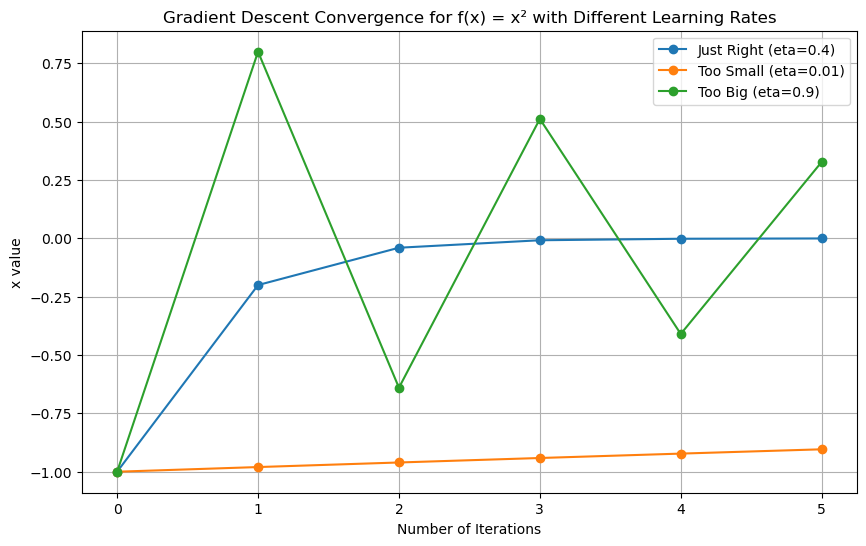

In [44]:
import matplotlib.pyplot as plt

# Plotting the convergence for different learning rates
plt.figure(figsize=(10, 6))
iterations = range(num_iterations + 1)

for description, history in histories.items():
#     print(history)
    # Matplotlib automatically selects different colors for each plt.plot() call if no specific color is provided
    plt.plot(iterations, history, marker='o', label=description)

plt.xlabel('Number of Iterations')
plt.ylabel('x value')
plt.title('Gradient Descent Convergence for f(x) = x² with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.xticks(iterations)
plt.show()

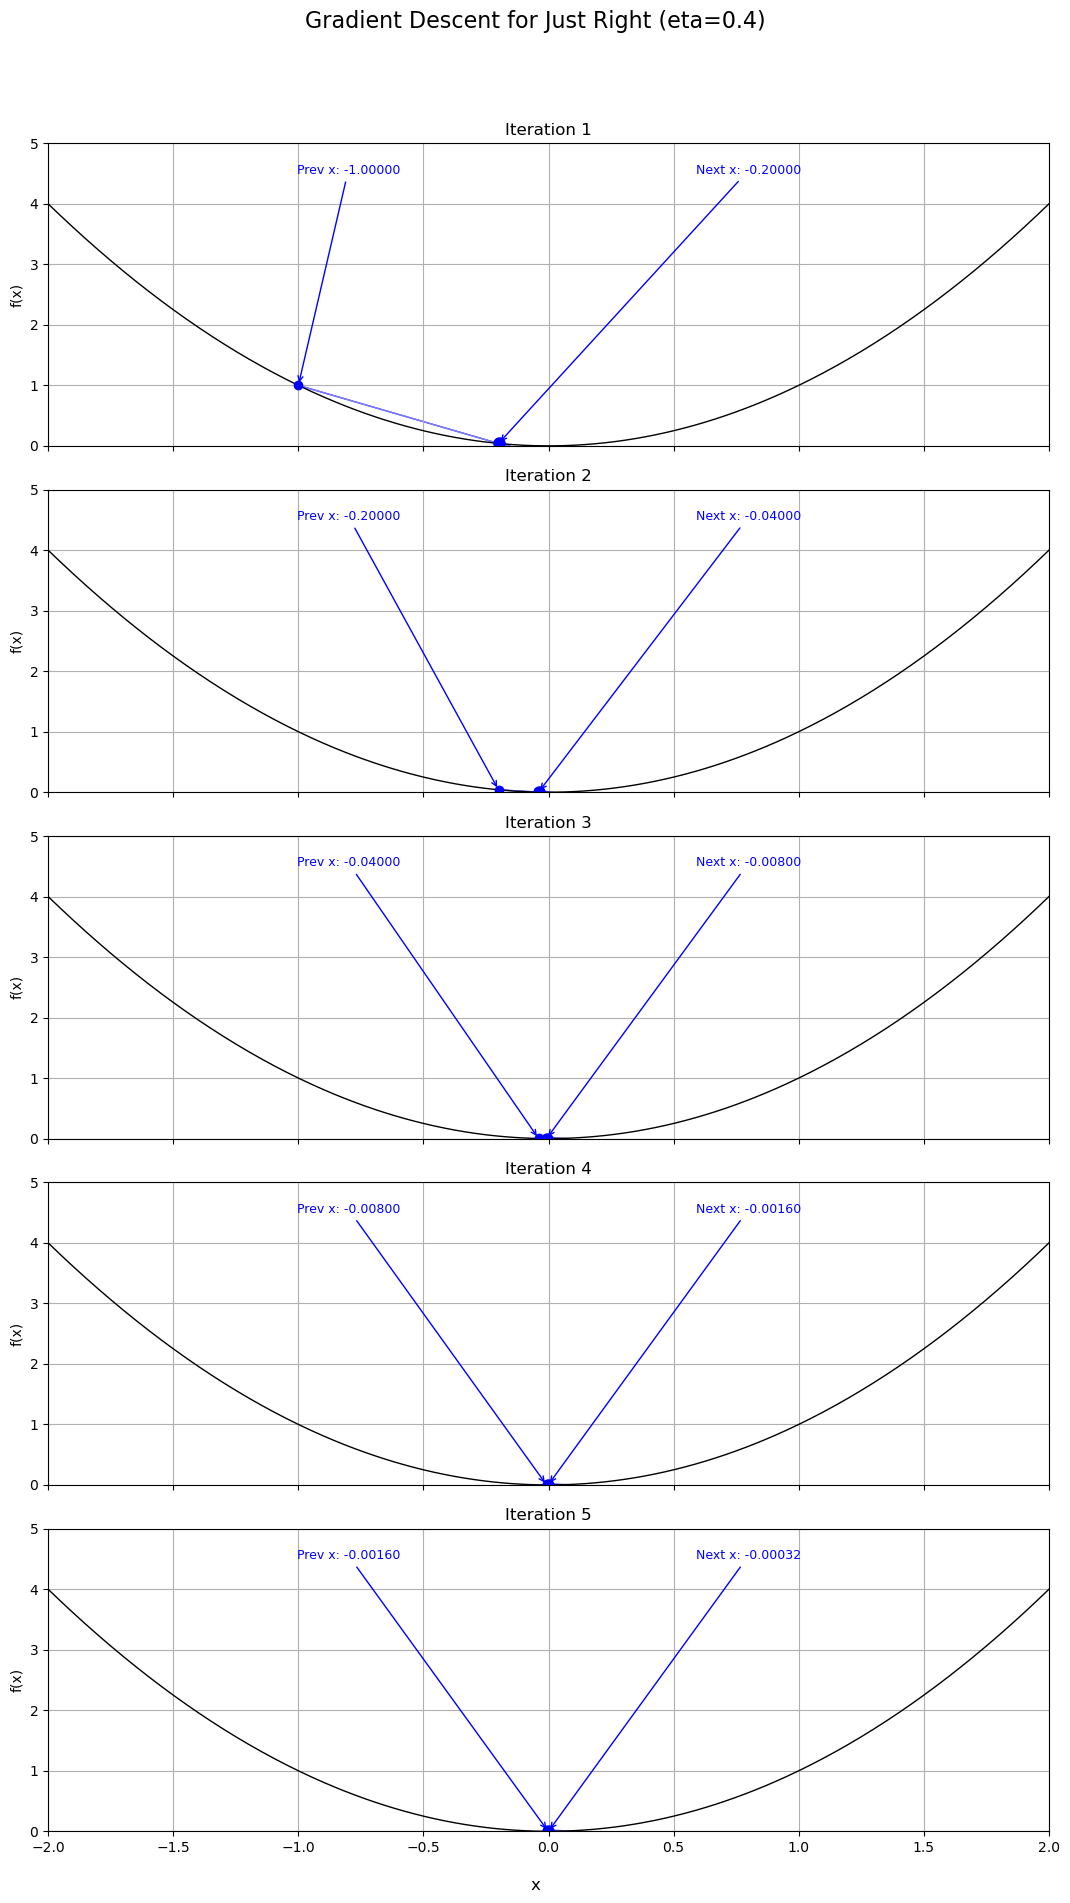

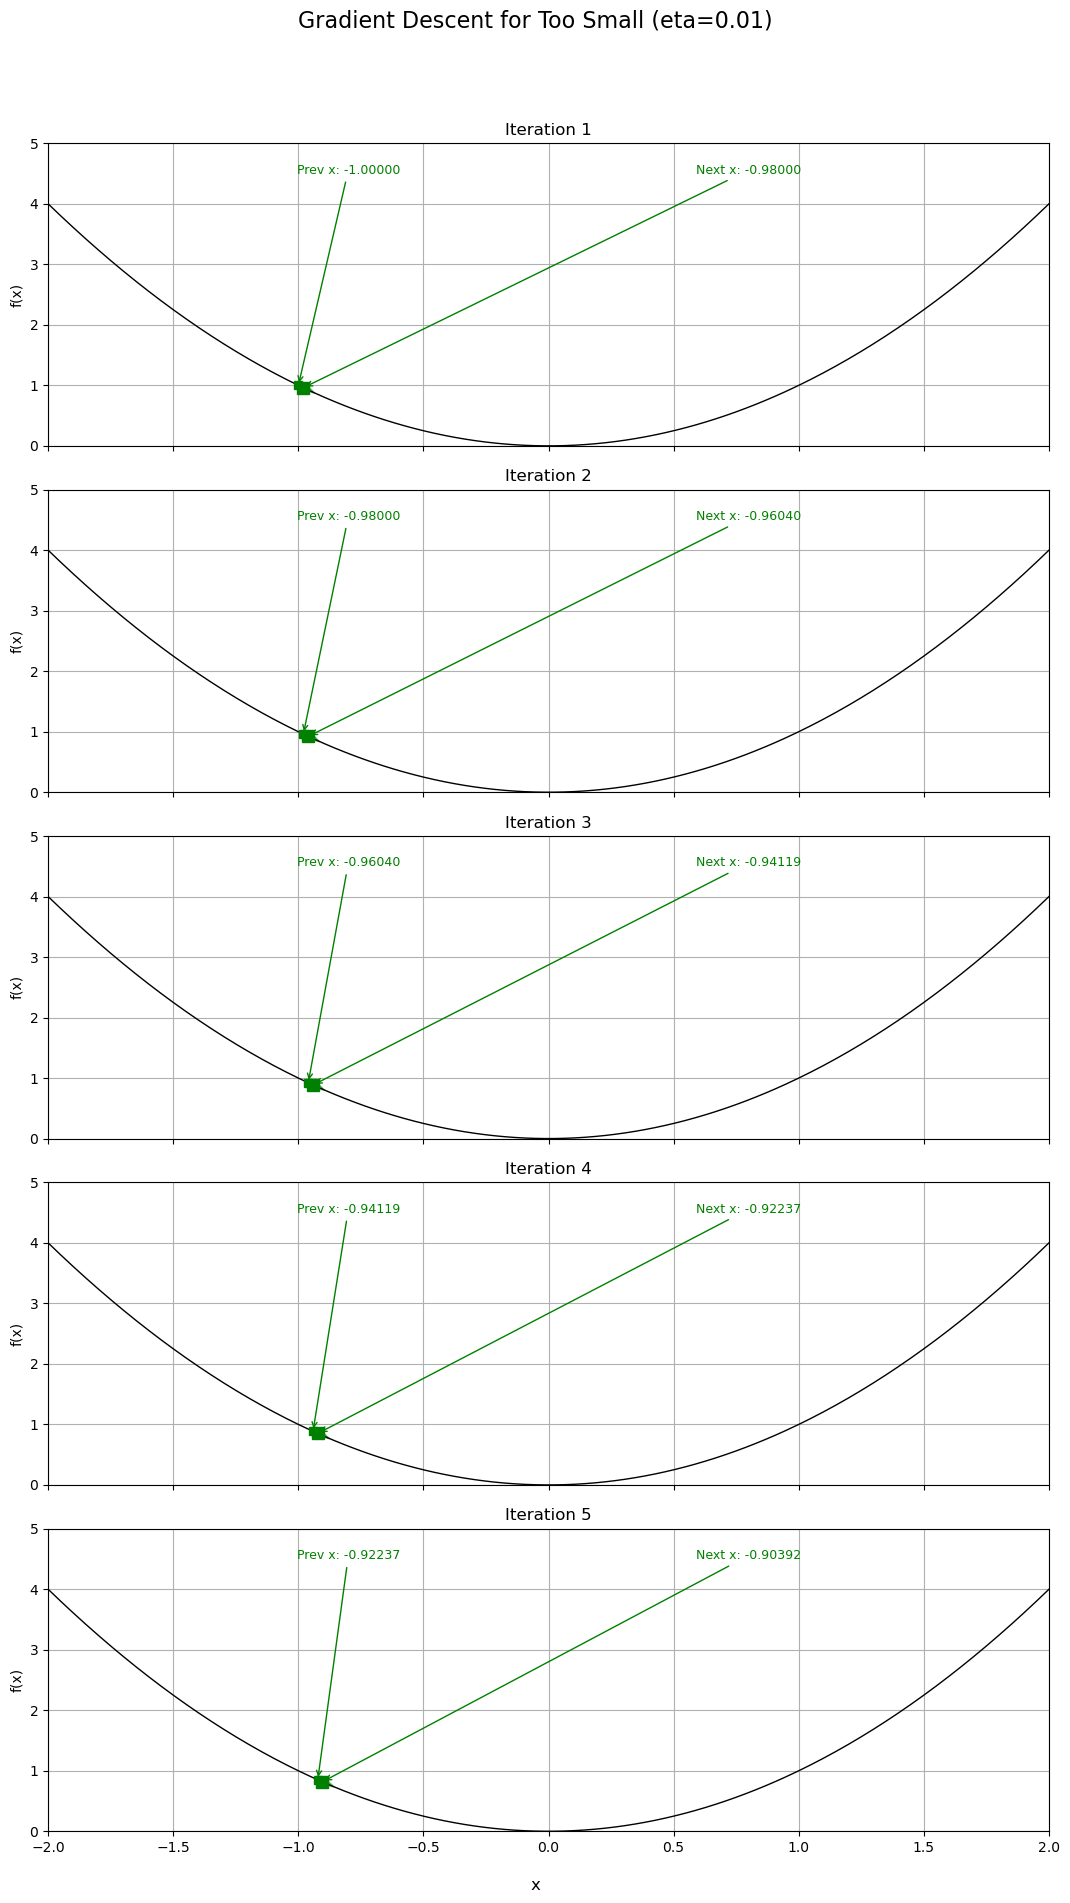

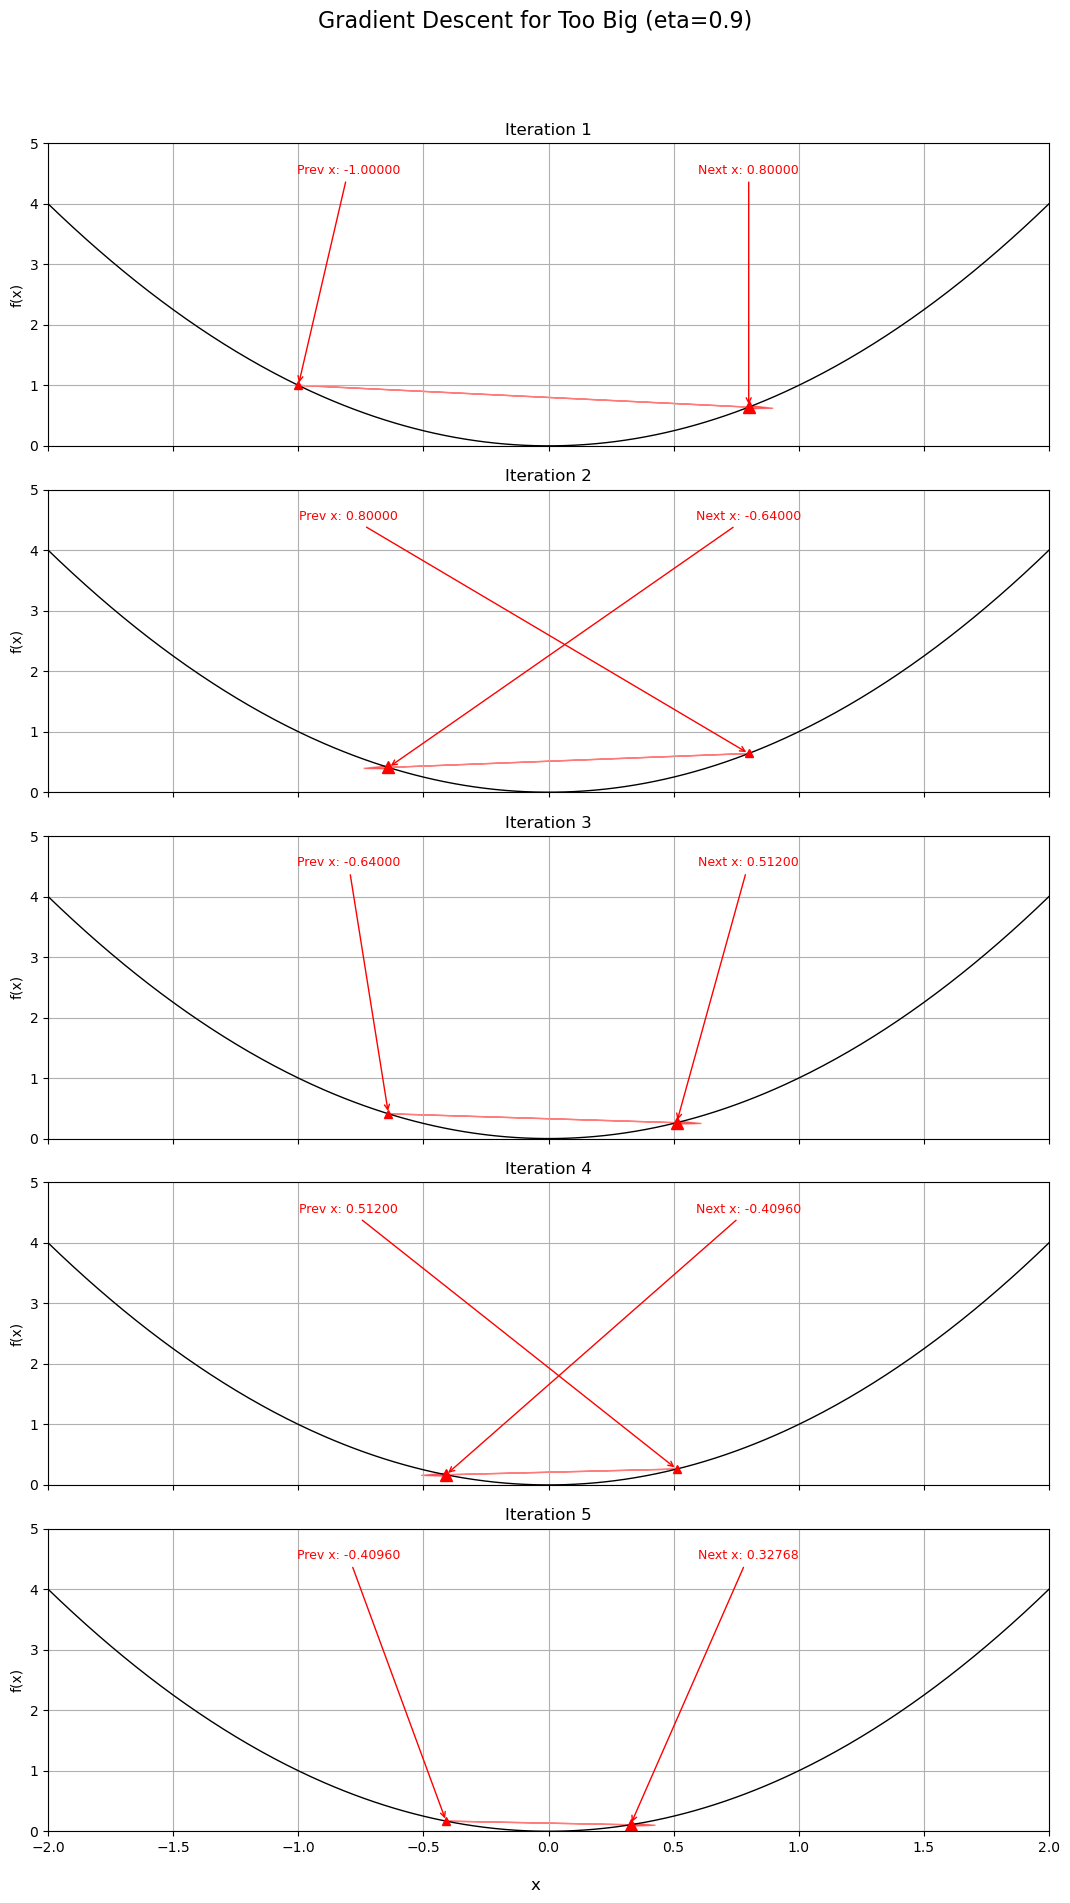

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its gradient
def f(x):
    """Cost function: f(x) = x^2"""
    return x ** 2

def grad_f(x):
    """Gradient of the cost function: f'(x) = 2x"""
    return 2 * x

# Implement Gradient Descent
def gradient_descent(f, grad_f, x_init, learning_rate, num_iters):
    """
    Performs gradient descent for a given number of iterations.

    Parameters:
        f (function): The cost function.
        grad_f (function): The gradient of the cost function.
        x_init (float): Initial value of x.
        learning_rate (float): Learning rate (eta).
        num_iters (int): Number of iterations.

    Returns:
        history (list): History of x values during optimization.
    """
    x = x_init
    history = [x]
    for i in range(num_iters):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        history.append(x_new)
        x = x_new
    return history

# Define learning rates and initialize
x0 = -1
num_iterations = 5
learning_rates = {
    'Just Right (eta=0.4)': 0.4,
    'Too Small (eta=0.01)': 0.01,
    'Too Big (eta=0.9)': 0.9
}

histories = {}
for description, eta in learning_rates.items():
    history = gradient_descent(f, grad_f, x0, eta, num_iterations)
    histories[description] = history

# Create separate figures for each learning rate
for description, eta in learning_rates.items():
    history = histories[description]
    color = 'blue' if eta == 0.4 else ('green' if eta == 0.01 else 'red')
    marker = 'o' if eta == 0.4 else ('s' if eta == 0.01 else '^')
    
    fig, axes = plt.subplots(num_iterations, 1, figsize=(12, 20), sharex=True)
    fig.suptitle(f'Gradient Descent for {description}', fontsize=16)
    
    for row in range(num_iterations):
        ax = axes[row]
        
        # Define a range for x to plot the function
        x_values = np.linspace(-2, 2, 400)
        y_values = f(x_values)
        
        # Plot the cost function
        ax.plot(x_values, y_values, label='f(x) = x^2', color='black', linewidth=1)
        
        # Previous and current x and y
        x_prev = history[row]
        y_prev = f(x_prev)
        x_current = history[row + 1]
        y_current = f(x_current)
        
        # Plot the points
        ax.plot(x_prev, y_prev, marker=marker, color=color, markersize=6)
        ax.plot(x_current, y_current, marker=marker, color=color, markersize=8)
        
        ax.annotate(f'Prev x: {x_prev:.5f}', xy=(x_prev, y_prev), 
                    xytext=(-0.8, 4.5), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=color),
                    fontsize=9, color=color, ha='center')

        ax.annotate(f'Next x: {x_current:.5f}', xy=(x_current, y_current), 
                    xytext=(0.8, 4.5), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=color),
                    fontsize=9, color=color, ha='center')
        
        # Draw the step taken as an arrow from previous to current
        ax.arrow(x_prev, y_prev, x_current - x_prev, y_current - y_prev, 
                 head_width=0.05, head_length=0.1, fc=color, ec=color, alpha=0.5)
        
        # Set title and labels for each subplot
        ax.set_title(f'Iteration {row + 1}')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.set_xlim(-2, 2)
        ax.set_ylim(0, 5)  # Adjusted y-axis for better visibility

    # Common x-axis label
    fig.text(0.5, 0.04, 'x', ha='center', fontsize=12)
    plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
    plt.show()

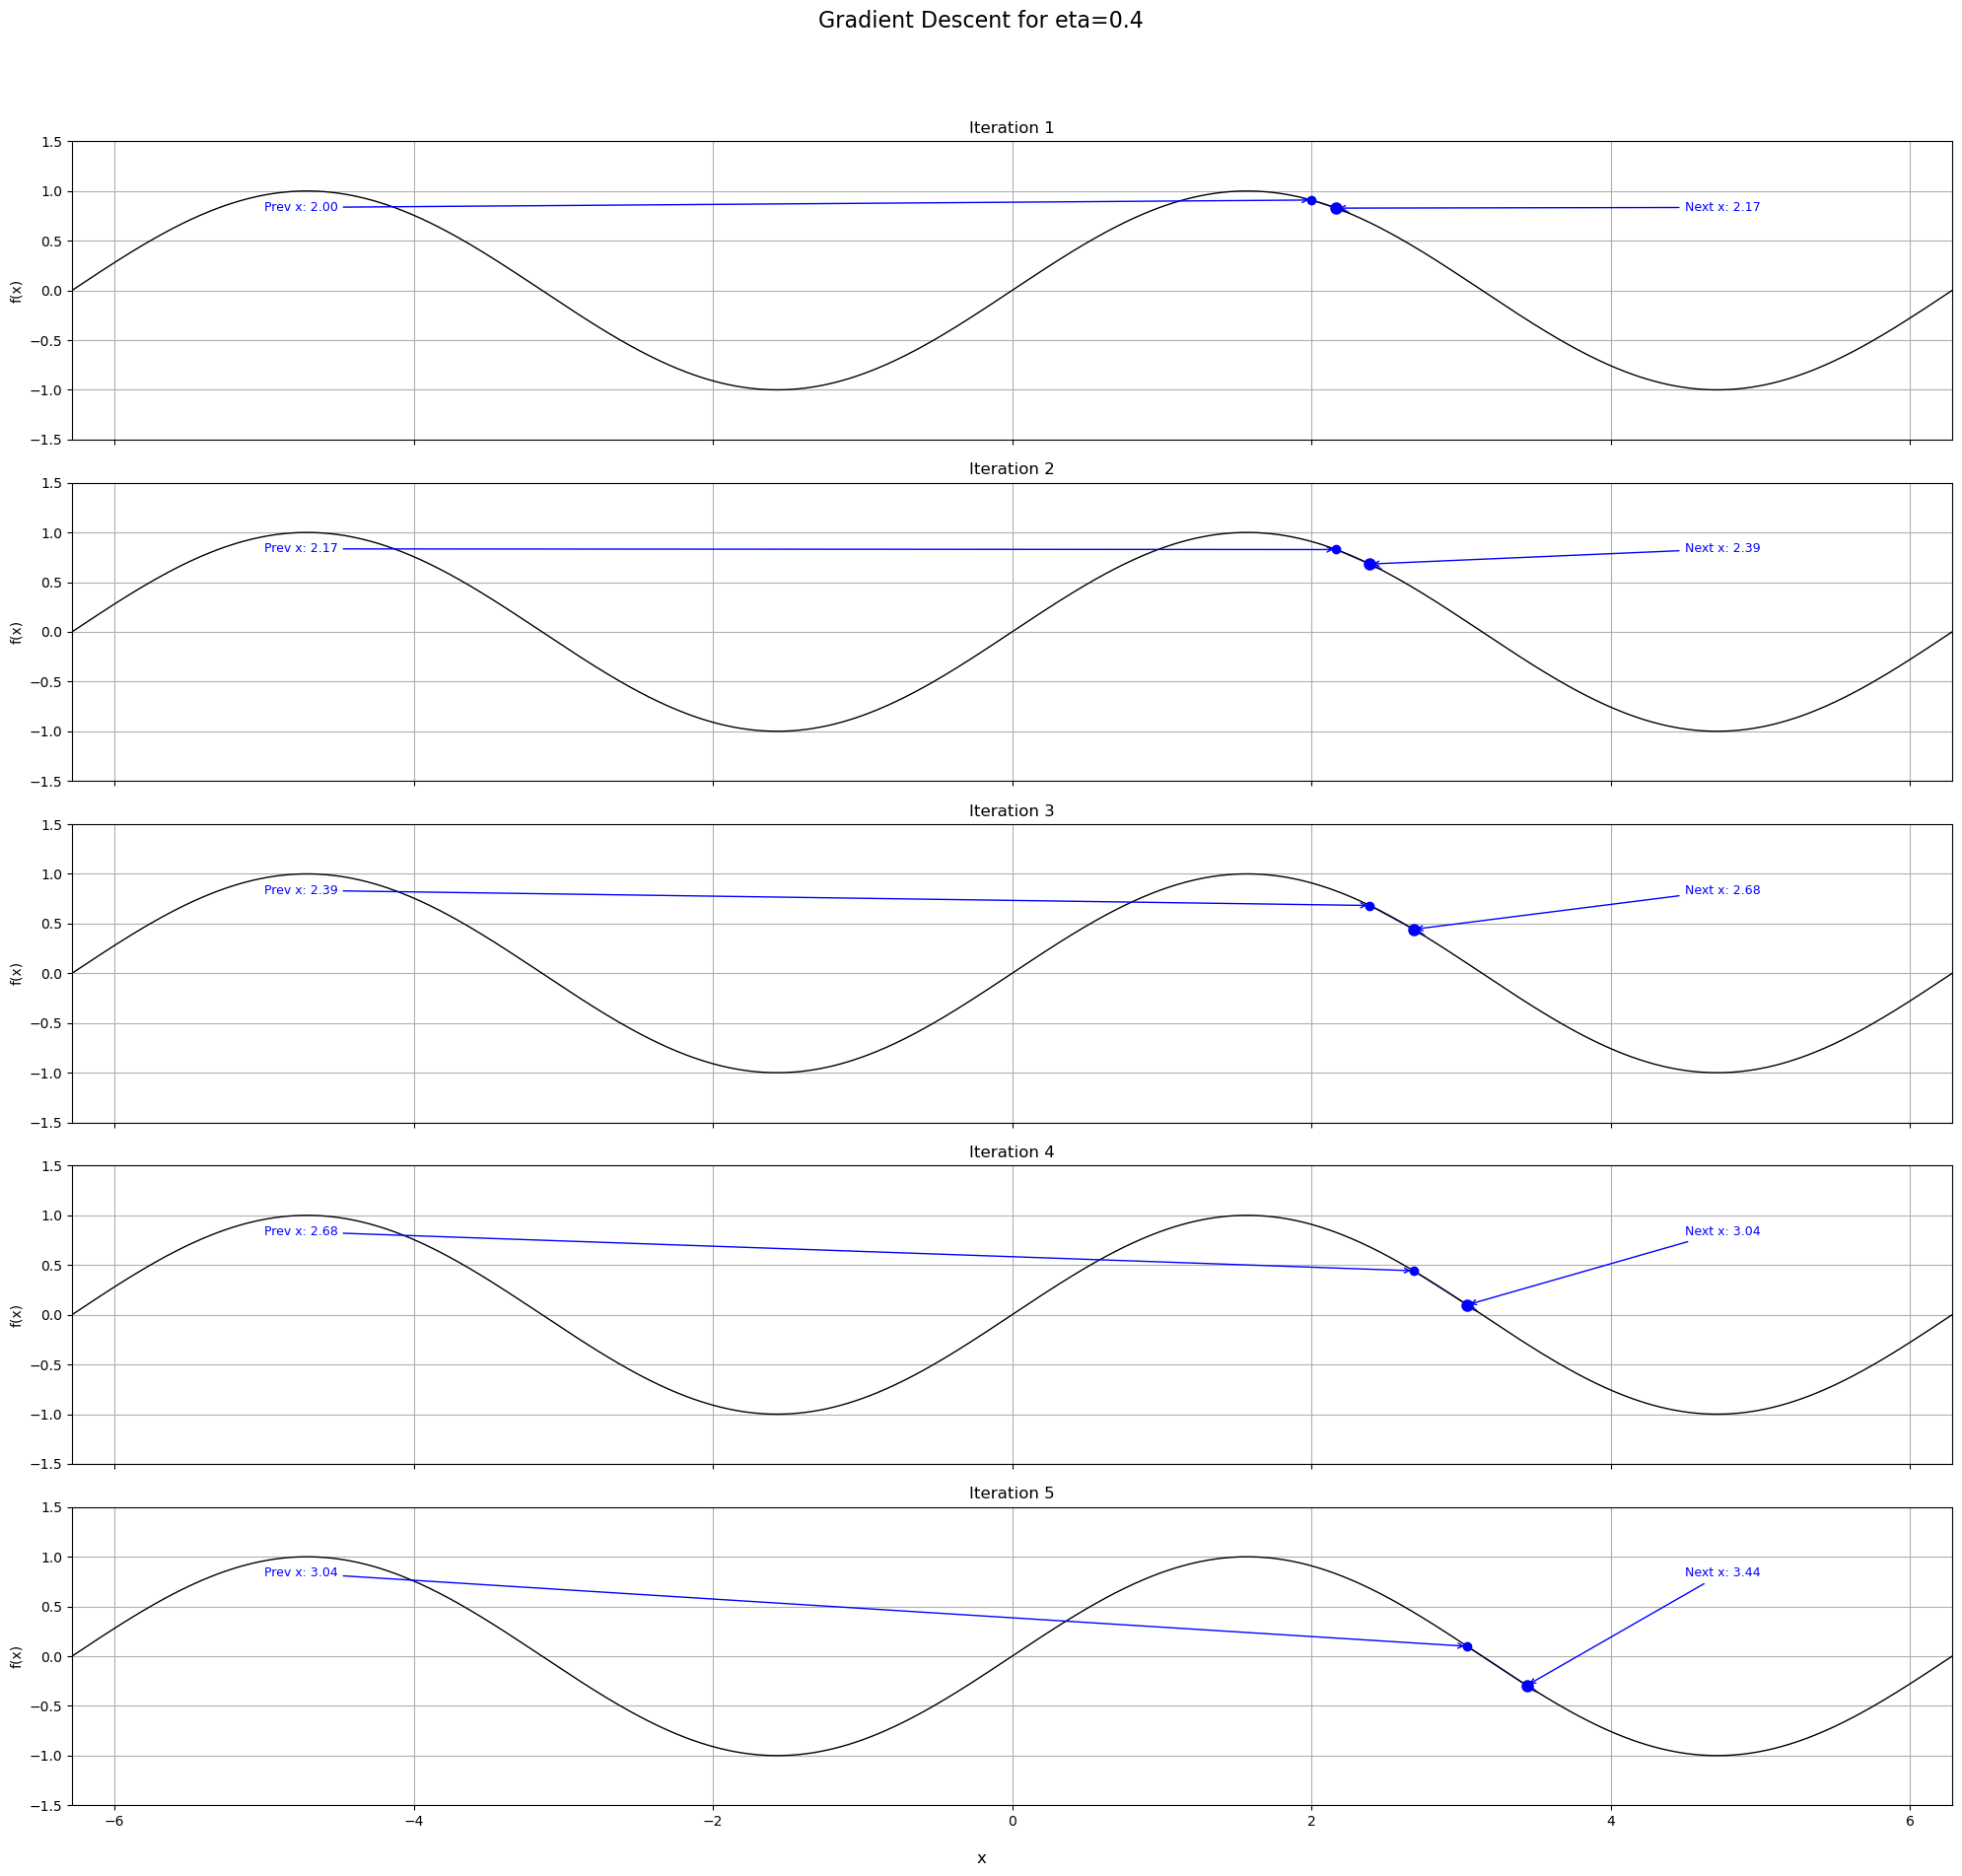

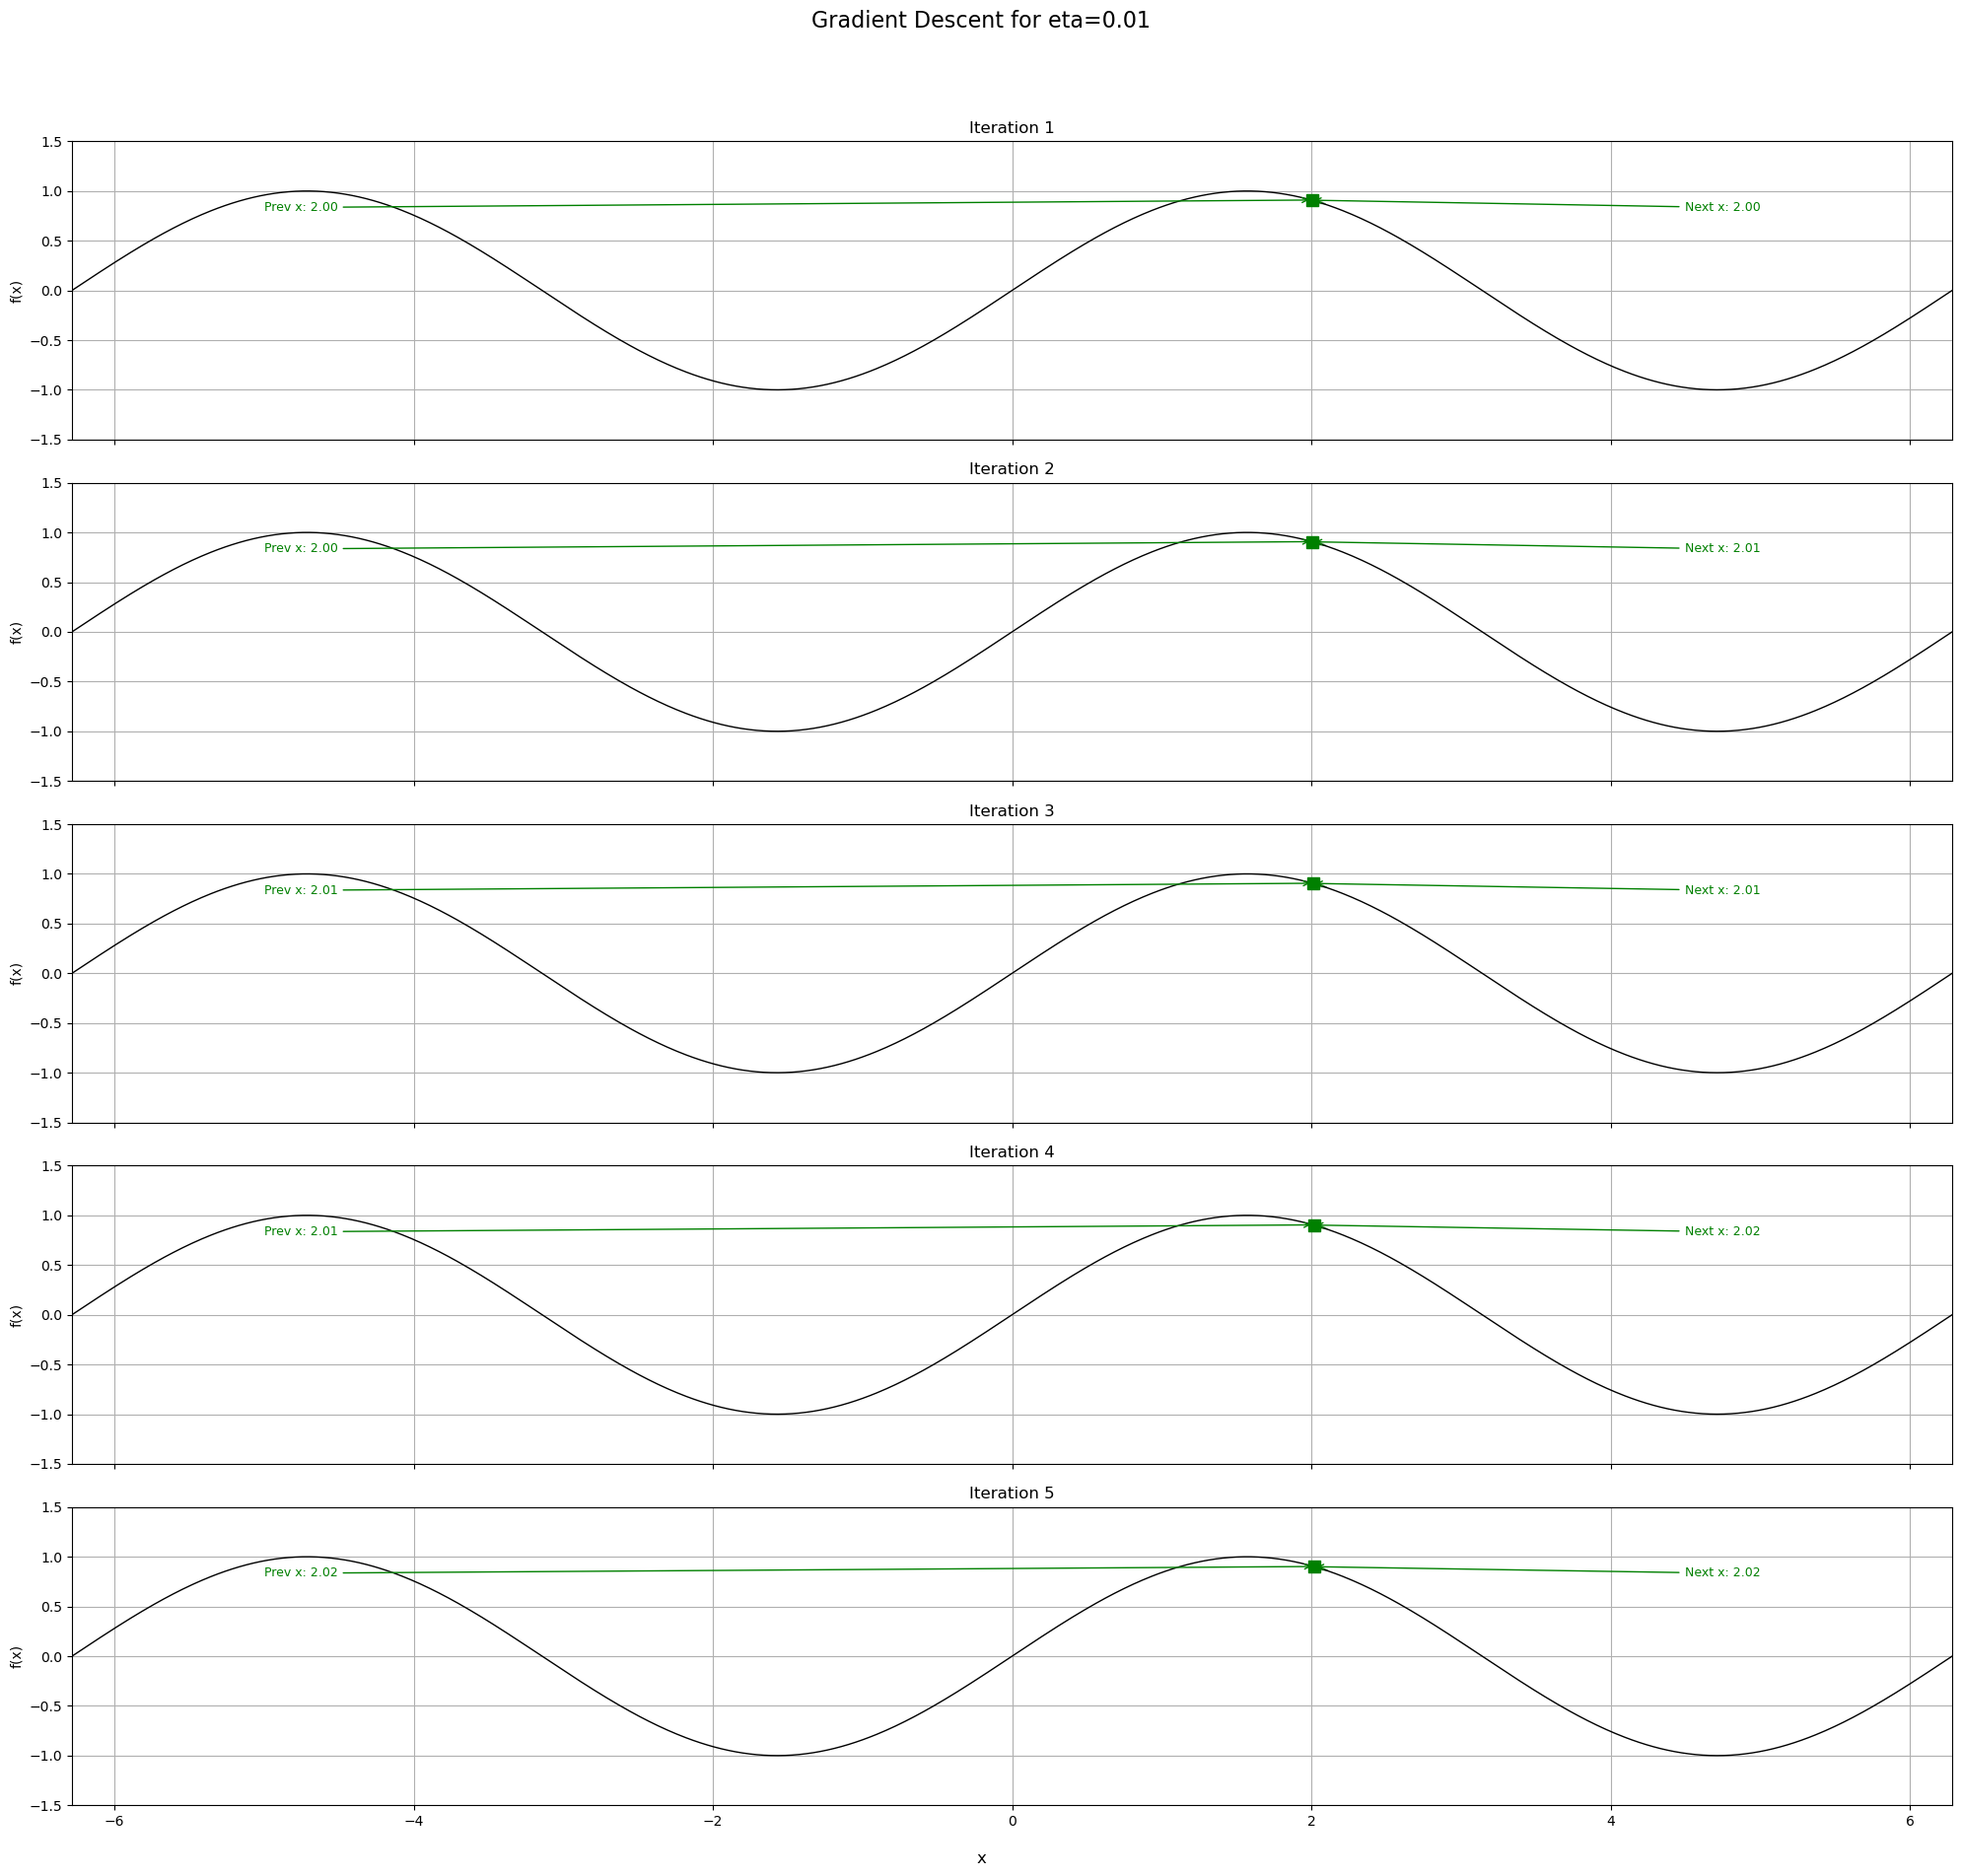

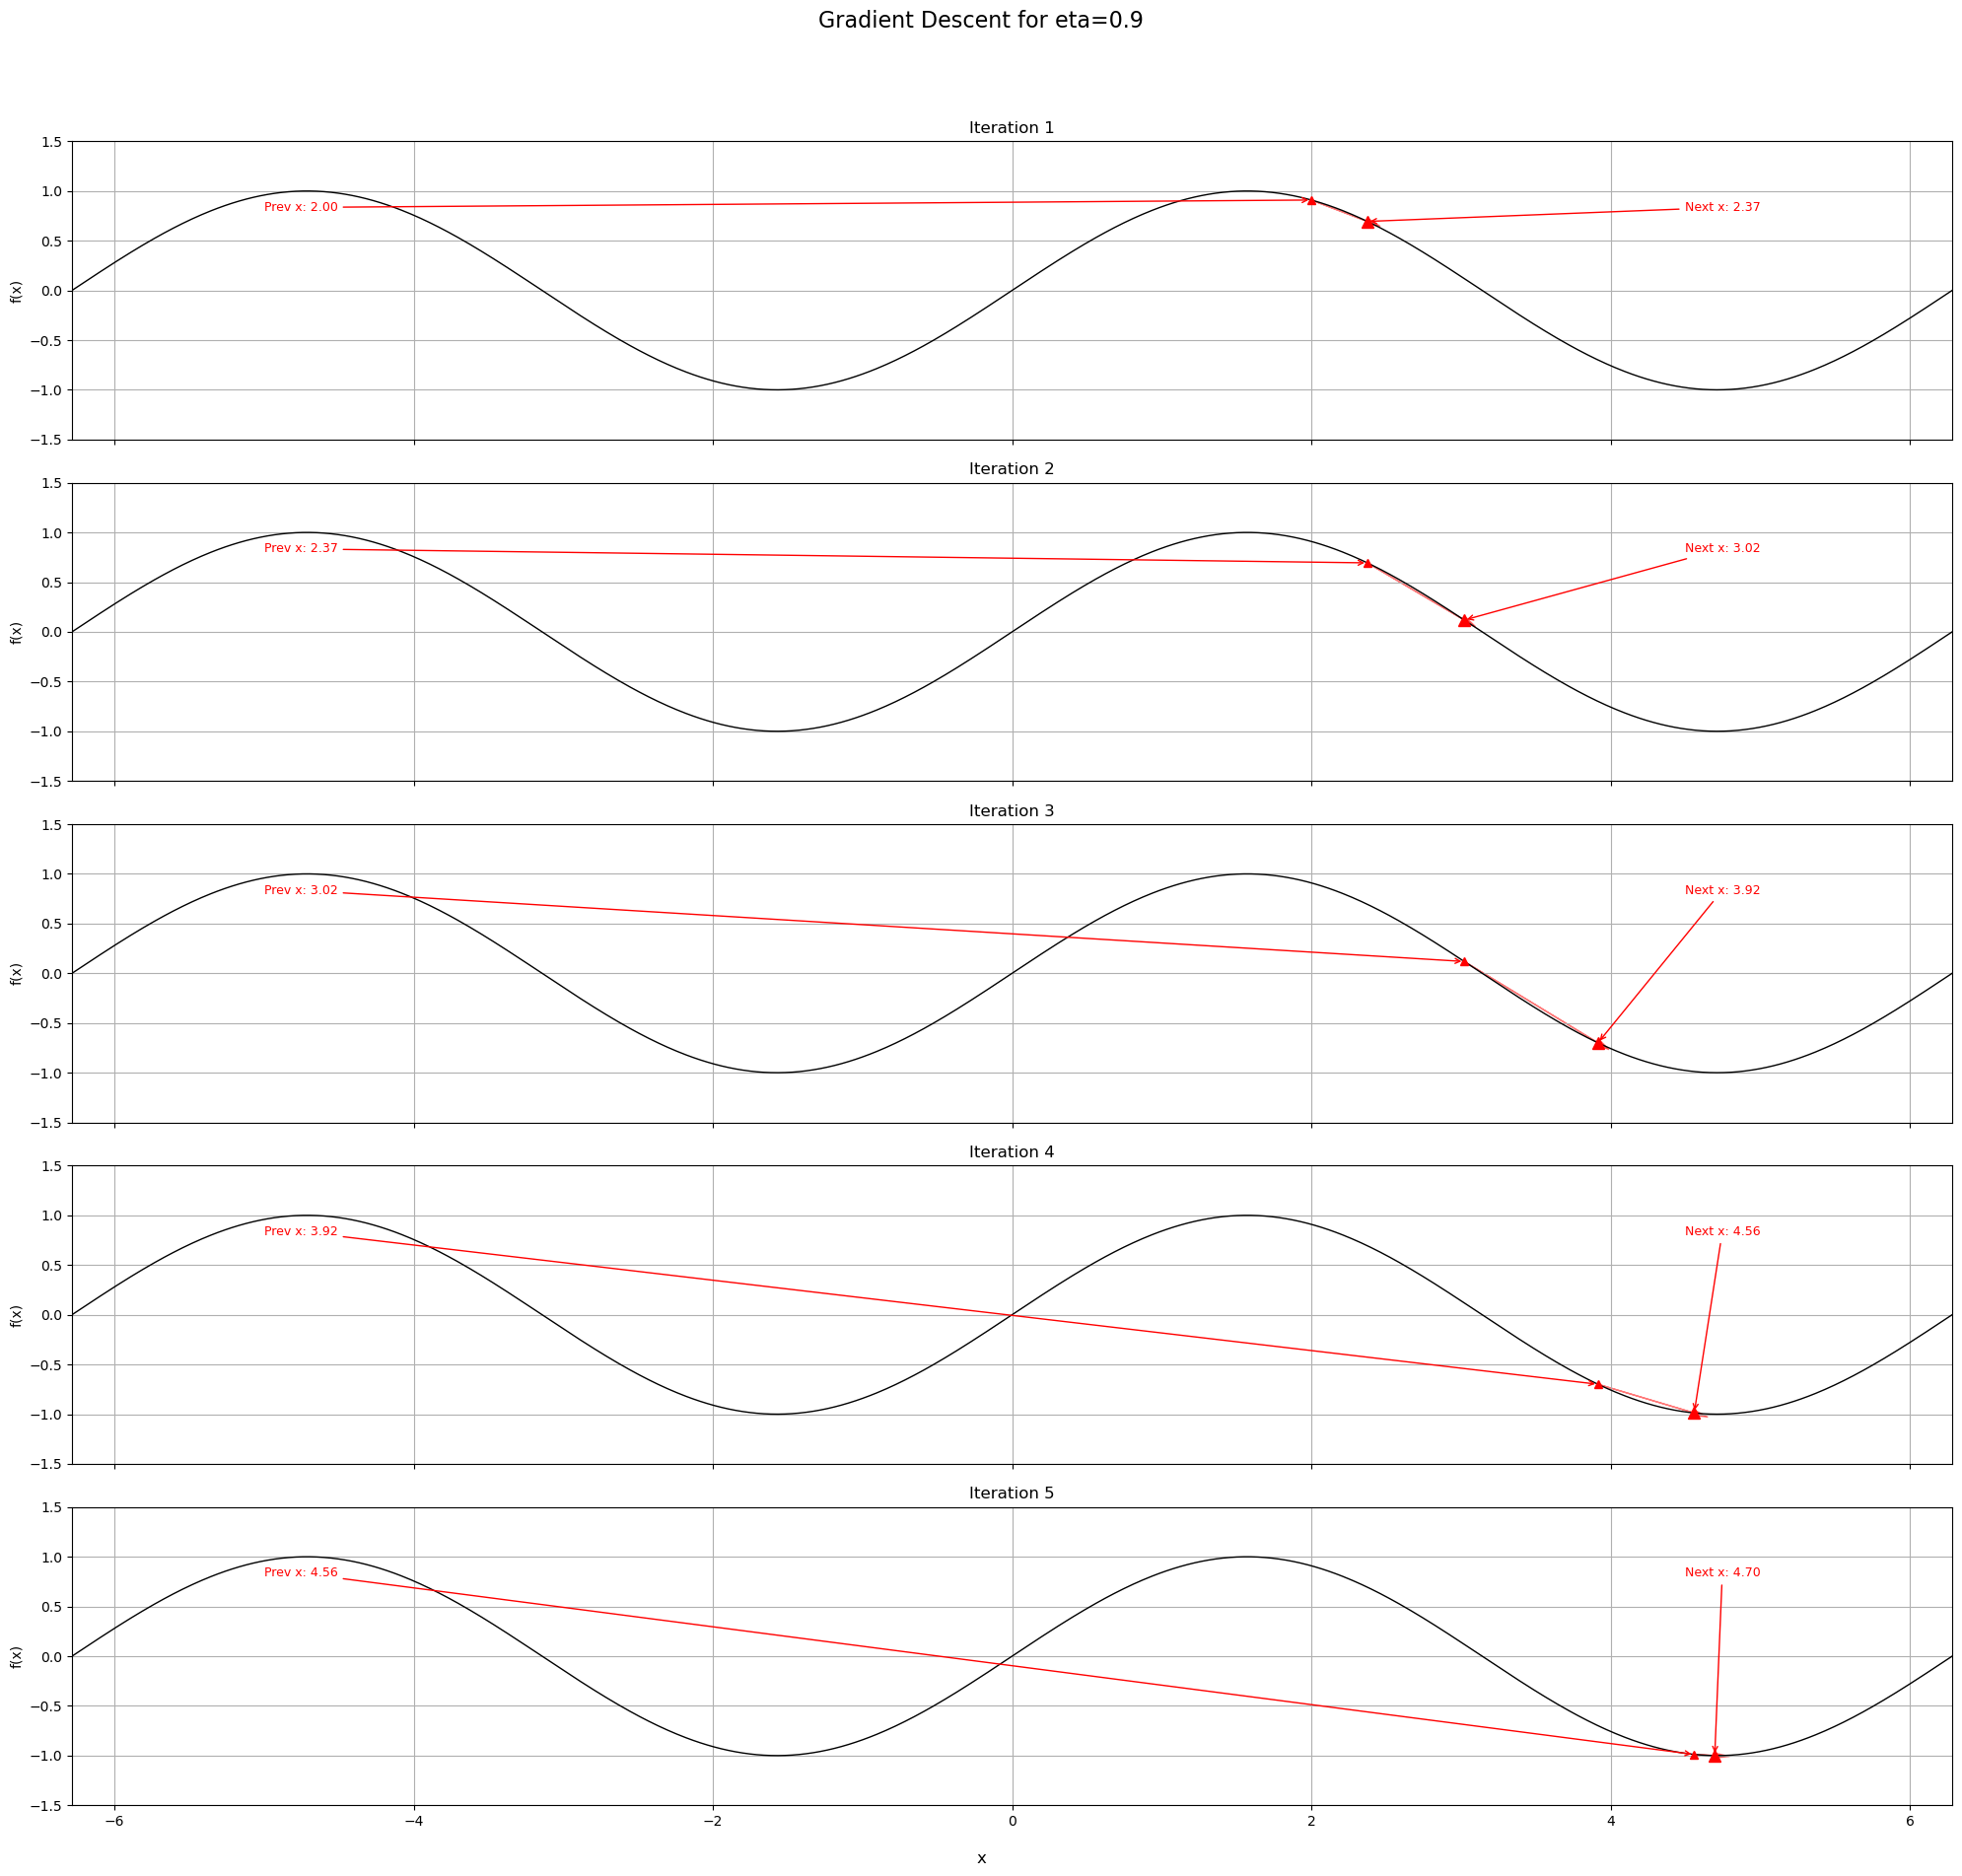

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its gradient
def f(x):
    """Cost function: f(x) = sin(x)"""
    return np.sin(x)

def grad_f(x):
    """Gradient of the cost function: f'(x) = cos(x)"""
    return np.cos(x)

# Implement Gradient Descent
def gradient_descent(f, grad_f, x_init, learning_rate, num_iters=5):
    """
    Performs gradient descent for a given number of iterations.

    Parameters:
        f (function): The cost function.
        grad_f (function): The gradient of the cost function.
        x_init (float): Initial value of x.
        learning_rate (float): Learning rate (eta).
        num_iters (int): Number of iterations.

    Returns:
        history (list): History of x values during optimization.
    """
    x = x_init
    history = [x]
    for i in range(num_iters):
        grad = grad_f(x)
        x_new = x - learning_rate * grad
        history.append(x_new)
        x = x_new
    return history

# Define learning rates and initialize
x0 = 2
num_iterations = 5
learning_rates = {
    'eta=0.4': 0.4,
    'eta=0.01': 0.01,
    'eta=0.9': 0.9
}

histories = {}
for description, eta in learning_rates.items():
    history = gradient_descent(f, grad_f, x0, eta, num_iters=num_iterations)
    histories[description] = history

# Create separate figures for each learning rate
for description, eta in learning_rates.items():
    history = histories[description]
    color = 'blue' if eta == 0.4 else ('green' if eta == 0.01 else 'red')
    marker = 'o' if eta == 0.4 else ('s' if eta == 0.01 else '^')
    
    fig, axes = plt.subplots(num_iterations, 1, figsize=(20, 20), sharex=True)
    fig.suptitle(f'Gradient Descent for {description}', fontsize=16)

    for row in range(num_iterations):
        ax = axes[row]
        
        # Define a range for x to plot the function
        x_values = np.linspace(-2 * np.pi, 2 * np.pi, 800)
        y_values = f(x_values)
        
        # Plot the cost function
        ax.plot(x_values, y_values, label='f(x) = sin(x)', color='black', linewidth=1)
        
        # Previous and current x and y
        x_prev = history[row]
        y_prev = f(x_prev)
        x_current = history[row + 1]
        y_current = f(x_current)
        
        # Plot the points
        ax.plot(x_prev, y_prev, marker=marker, color=color, markersize=6)
        ax.plot(x_current, y_current, marker=marker, color=color, markersize=8)
        
        # Place "Prev x" and "Next x" labels with arrows pointing to the points
        ax.annotate(f'Prev x: {x_prev:.2f}', xy=(x_prev, y_prev), 
                    xytext=(-5, 0.8), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=color),
                    fontsize=9, color=color, ha='left')

        ax.annotate(f'Next x: {x_current:.2f}', xy=(x_current, y_current), 
                    xytext=(5, 0.8), textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=color),
                    fontsize=9, color=color, ha='right')
        
        # Draw the step taken as an arrow from previous to current
        ax.arrow(x_prev, y_prev, x_current - x_prev, y_current - y_prev, 
                 head_width=0.05, head_length=0.1, fc=color, ec=color, alpha=0.5)
        
        # Set title and labels for each subplot
        ax.set_title(f'Iteration {row + 1}')
        ax.set_ylabel('f(x)')
        ax.grid(True)
        ax.set_xlim(-2 * np.pi, 2 * np.pi)
        ax.set_ylim(-1.5, 1.5)  # Adjusted y-axis for better visibility

    # Common x-axis label
    fig.text(0.5, 0.04, 'x', ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# **Visualization Observations, Explanations and Takeaways**

- **Just Right ($\eta = 0.4$):**
    - Rapid convergence towards the minimum at $x = 0$.
    - Balances convergence speed and stability.
- **Too Small ($\eta = 0.01$):**
    - Very slow convergence, requiring many more iterations to approach $x = 0$.
    - Leads to slow convergence, requiring many iterations.
- **Too Big ($\eta = 0.9$):**
    - Causes overshooting and possible divergence, preventing convergence.
   
---

# **How to choose Learning Rate**
- Trial and Error
- Use a variant of Vanilla Gradient Descent (e.g., Adaptive methods like **Adam** automatically adjust the learning rate during training based on past gradients to *speed up at the start and slow down as it approaches a local minimum*).

# THE END

Feedback link: https://forms.gle/HdHMeF6Kkf9vLyia9.

Contact me if you have any questions!